In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import animation
from matplotlib.patches import Rectangle
from IPython.display import HTML

from coordinates import *
from verlet import *

In [62]:
NUMBER_FCC_UNITS = 3

positions_ini, box, boxl = initialize_positions(NUMBER_FCC_UNITS, REDUCED_DENSITY, see_atoms=False, savedir=None)
velocities_ini = initialize_velocities(positions_ini, reduced_temperature=REDUCED_TEMPERATURE, savedir=None)
# plot_velocity_hist(velocities_ini, False)

TIMESTEP = 0.0001
N_STEPS = 10000

res = do_md(positions_ini, velocities_ini, dt=TIMESTEP, n_steps=N_STEPS)

x_traj, v_traj, pot, kin, forc = res

100%|██████████████████████████████████████| 9999/9999 [00:51<00:00, 193.88it/s]


In [63]:
positions_movie_xy = x_traj[:,:,1:3]
positions_movie_yz = x_traj[:,:,2:4]
positions_movie_xy_short = positions_movie_xy[0:-1:10]  # subsampling every 10ths entry
positions_movie_yz_short = positions_movie_yz[0:-1:10]  # subsampling every 10ths entry

# Setup the figure and axes...
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].set(xlim=(-7, 7), ylim=(-7, 7))
ax[0].set(xlabel='x', ylabel='y')
ax[0].add_patch(Rectangle((box[0,0],box[0,1]), boxl, boxl, fill=False, lw=2))
ax[1].set(xlim=(-7, 7), ylim=(-7, 7))
ax[1].set(xlabel='y', ylabel='z')
ax[1].add_patch(Rectangle((box[0,0],box[0,2]), boxl, boxl, fill=False, lw=2))

scat1 = ax[0].scatter(positions_movie_xy_short[0,:,0], positions_movie_xy_short[0,:,1], marker='o')
scat2 = ax[1].scatter(positions_movie_yz_short[0,:,0], positions_movie_yz_short[0,:,1], marker='o')

def animate(i):
    scat1.set_offsets(positions_movie_xy_short[i])
    scat2.set_offsets(positions_movie_yz_short[i])

ani = animation.FuncAnimation(fig, animate, frames=len(positions_movie_xy_short))
plt.close()
## this function will create a lot of *.png files in a folder 'atom_test2d_frames'
ani.save('Animations/atoms_test2d33355.html', writer=animation.HTMLWriter(fps=30))

In [64]:
HTML('Animations/atoms_test2d33355.html')

In [84]:
def inbox(p, box0, box1):
    if (p > box0).all() and (p < box1).all():
        pass
    else:
        for i in range(3):
            if p[i] < box0[i]:
                p[i] += boxl
            elif p[i] > box1[i]:
                p[i] -= boxl
            else:
                pass
    return p

In [85]:
inbox([1,3,1], box[0], box[0] + boxl * np.ones(3))

[1, -2.038788574147522, 1]

In [30]:
from coordinates import *
from neighbors2 import *
from verlet import *
from verlet_slow import *
from fake_inputs import *
import os
from matplotlib.patches import Rectangle

SAVEDIR = os.getcwd() + '/MD_simulation/files'
NUMBER_FCC_UNITS = 4

positions_ini, BOX, BOXL = initialize_positions(NUMBER_FCC_UNITS, REDUCED_DENSITY, see_atoms=False, savedir=None)
velocities_ini = initialize_velocities(positions_ini, reduced_temperature=REDUCED_TEMPERATURE, savedir=None)
# plot_velocity_hist(velocities_ini, False)

TIMESTEP = 0.0001
N_STEPS = 10000

res = do_md_pdb(positions_ini, velocities_ini, dt=TIMESTEP, n_steps=N_STEPS, box=BOX, boxl=BOXL)

x_traj, v_traj, pot, kin, forc, ptosb = res

vor dem for loop


100%|███████████████████████████████████████| 9999/9999 [02:33<00:00, 65.07it/s]


In [31]:
positions_movie_xy = x_traj[:,:,1:3]
positions_movie_xy_short = positions_movie_xy[0:-1:10]  # subsampling every 10ths entry

# Setup the figure and axes...
fig, ax = plt.subplots(figsize=(6,6))
ax.set(xlim=(-0.6 * BOXL, 0.6 * BOXL), ylim=(-0.6 * BOXL, 0.6 * BOXL))
ax.set(xlabel='x', ylabel='y')
ax.add_patch(Rectangle((BOX[0,0],BOX[0,1]), BOXL, BOXL, fill=False, lw=2))

scat1 = ax.scatter(positions_movie_xy_short[0,:,0], positions_movie_xy_short[0,:,1], marker='o')

def animate(i):
    scat1.set_offsets(positions_movie_xy_short[i])

ani = animation.FuncAnimation(fig, animate, frames=len(positions_movie_xy_short))
plt.close()
## this function will create a lot of *.png files in a folder 'atom_test2d_frames'
ani.save('Animations/atoms_test2d33355xxxxxx.html', writer=animation.HTMLWriter(fps=30))

In [32]:
HTML('Animations/atoms_test2d33355xxxxxx.html')

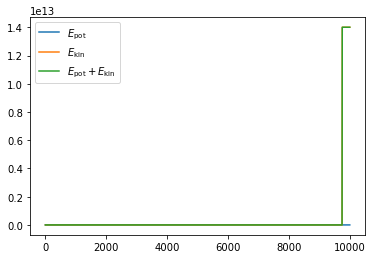

In [33]:
stop = -1
steparr = np.arange(N_STEPS)
plt.plot(steparr[:stop], pot[:stop], label="$E_\mathrm{pot}$")
plt.plot(steparr[:stop], kin[:stop], label="$E_\mathrm{kin}$")
plt.plot(steparr[:stop], pot[:stop] + kin[:stop], label="$E_\mathrm{pot} + E_\mathrm{kin}$")
plt.legend()